In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [26]:
cd '/content/drive/My Drive/Colab Notebooks/data-workshop'

/content/drive/My Drive/Colab Notebooks/data-workshop


In [27]:
ls

Hello_github.ipynb  Matrix1_3.ipynb  mens_shoes_prices.csv  README.md
LICENSE             Matrix1_4.ipynb  mensshoes_prices.csv   shoes_prices.csv


In [28]:
df = pd.read_csv('mensshoes_prices.csv', low_memory = False)
df.shape

(18280, 48)

In [29]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

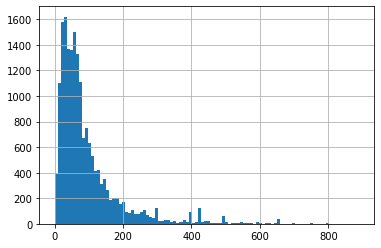

In [30]:
df['prices_amountmin'].hist(bins = 100)

In [0]:
mean_price = np.mean(df['prices_amountmin'])
median_price = np.median(df['prices_amountmin'])
log_mean_price = np.expm1(np.mean(np.log1p(df['prices_amountmin'])))

In [32]:
y_true = df['prices_amountmin']
y_pred_mean = y_true.shape[0] * [mean_price]
y_pred_median = y_true.shape[0] * [median_price]
y_pred_log = y_true.shape[0] * [log_mean_price]

print(mean_absolute_error(y_true, y_pred_mean))
print(mean_absolute_error(y_true, y_pred_median))
print(mean_absolute_error(y_true, y_pred_log))

63.968341227870624
58.01120240700219
58.03539547661041


In [33]:
# Now we'll try machine learning model
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
# We need to FACTORIZE the brand column and we give them unique ID.
df['brand_factorized'] = df['brand'].factorize()[0]
df['prices_condition_factorized'] = df['prices_condition'].factorize()[0]


In [35]:
df.prices_condition

0                 NaN
1                 new
2                 new
3                 new
4                 new
             ...     
18275    New with box
18276             new
18277             NaN
18278             NaN
18279             NaN
Name: prices_condition, Length: 18280, dtype: object

In [0]:
# Setting train and test datasets with a function
def run_model(feats):
  X = df[ feats ].values #needed two square brackets
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth = 5)
  scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [37]:
# Checking performance for some cases
print(run_model(['brand_factorized']))
print(run_model(['prices_condition_factorized']))
print(run_model(['brand_factorized','prices_condition_factorized']))

(-58.38655694633361, 4.223555478221712)
(-61.49250376884938, 4.816634885797595)
(-58.9984869172428, 4.688574360312536)
